### Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data.

### Technically, The primary motive of EDA is to

- Examine the data distribution
- Handling missing values of the dataset(a most common issue with every dataset)
- Handling the outliers
- Removing duplicate data
- Encoding the categorical variables
- Normalizing and Scaling
- Handling Imbalanced Data

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Data**

In [6]:
data = pd.read_csv(r"C:\Users\91879\Desktop\Learning-AI\Machine Learning\CarPrice_Assignment.csv")
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

According to the output above, we have 205 entries or rows, as well as 26 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 205 then there is no missing values for that particular feature. The 'price' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (8 int64 and 8 float64) and object data types (10 object).

In [8]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The `describe()` function provides the statistical information about all numeric values.

### **Lets check for the null values**

In [10]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**As we can see, there are no null values present in the data, we can move forward with further steps. But for the case if there are null values present in the data, there are multiple ways to handle them, which are listed below:**

### **Ways to Handle Missing Values**

#### **1. Drop the null values**
values can be dropeed if the data is huge and the missing values are few

In [12]:
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, np.nan, 8],
        'C': [9, 10, 11, 12]})

# Drop rows with missing values in any column
print(df.dropna(axis=0, how='any'))

# Drop columns with missing values
print(df.dropna(axis=1))


     A    B   C
0  1.0  5.0   9
3  4.0  8.0  12
    C
0   9
1  10
2  11
3  12


#### **2. Replace with mean/median/mode**
Missing values can be replace with:
- Mean (if the data has no outliers)
- Median (if the data has outliers)
- Mode (In case of categorical feature)

In [13]:
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, np.nan, 8, 10],
    'C': ['X', 'Y', np.nan, 'Z', np.nan]
})

# Replace missing values in columns 'A' and 'B' with median
print(df['A'].fillna(df['A'].mean()))
print(df['B'].fillna(df['B'].mean()))

# Replace missing values in columns 'A' and 'B' with median
print(df['A'].fillna(df['A'].median()))
print(df['B'].fillna(df['B'].median()))

# Replace missing values in column 'C' with mode
print(df['C'].fillna(df['C'].mode()[0]))

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: A, dtype: float64
0     5.000000
1     7.666667
2     7.666667
3     8.000000
4    10.000000
Name: B, dtype: float64
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: A, dtype: float64
0     5.0
1     8.0
2     8.0
3     8.0
4    10.0
Name: B, dtype: float64
0    X
1    Y
2    X
3    Z
4    X
Name: C, dtype: object


#### **3. Using Sklearn's SimpleImputer:**
Choose strategy: 'mean', 'median', 'most_frequent', 'constant'

In [16]:
from sklearn.impute import SimpleImputer
data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, np.nan, 8],
        'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)
imputer = SimpleImputer(strategy='mean')
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_filled)

          A    B     C
0  1.000000  5.0   9.0
1  2.000000  6.5  10.0
2  2.333333  6.5  11.0
3  4.000000  8.0  12.0


#### **4. Using Advanced Imputation (KNN Imputation)**

In [18]:
from sklearn.impute import KNNImputer

data = {'A': [1, 2, np.nan, 4],
        'B': [5, np.nan, np.nan, 8],
        'C': [9, 10, 11, 12]}
df = pd.DataFrame(data)
imputer = KNNImputer(n_neighbors=5)
df_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_filled)

          A    B     C
0  1.000000  5.0   9.0
1  2.000000  6.5  10.0
2  2.333333  6.5  11.0
3  4.000000  8.0  12.0


### **Handling Duplicate Values in Data**

In [19]:
# Identifying duplicate rows

data = {'A': [1, 2, 2, 3, 4],
        'B': ['X', 'Y', 'Y', 'Z', 'Z']}
df = pd.DataFrame(data)

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

   A  B
2  2  Y


In [20]:
# Counting occurrences of duplicate rows
duplicate_count = df.duplicated().sum()
print(duplicate_count)

# Counting occurrences of duplicates based on columns 'A' and 'B'
specific_duplicates_count = df.duplicated(subset=['A', 'B']).sum()
print(specific_duplicates_count)

1
1


In [21]:
# Removing duplicate rows
print(df.drop_duplicates())
# Removing duplicates based on columns 'A' and 'B'
print(df.drop_duplicates(subset=['A', 'B']))

   A  B
0  1  X
1  2  Y
3  3  Z
4  4  Z
   A  B
0  1  X
1  2  Y
3  3  Z
4  4  Z


In [22]:
# Keeping the first occurrence and dropping duplicates
df.drop_duplicates(keep='first') #can be 'last' as well

,A,B
0,1,X
1,2,Y
3,3,Z
4,4,Z


### **Handling Outliers in Data**

#### **1. Using Interquartile Range (IQR) Method**

In [23]:
# Sample DataFrame with numerical column 'A'
data = {'A': [10, 15, 20, 25, 30, 35, 200]}
df = pd.DataFrame(data)

# Calculate IQR
Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = df[(df['A'] < Q1 - 1.5 * IQR) | (df['A'] > Q3 + 1.5 * IQR)]

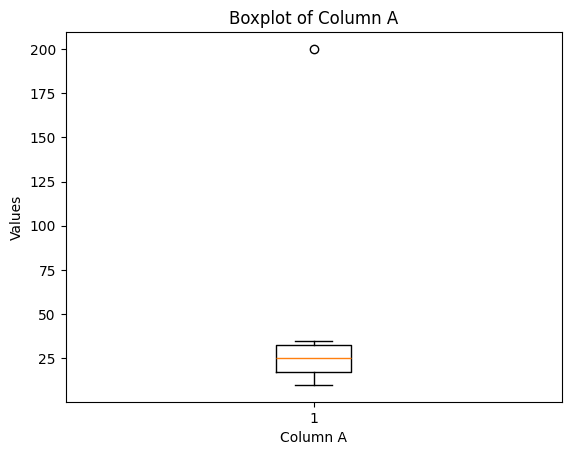

In [24]:
# Boxplot for outlier visualization
plt.boxplot(df['A'])
plt.xlabel('Column A')
plt.ylabel('Values')
plt.title('Boxplot of Column A')
plt.show()

##### **Removing Outliers Using IQR**

In [25]:
# Remove outliers based on IQR
df = df[~((df['A'] < Q1 - 1.5 * IQR) | (df['A'] > Q3 + 1.5 * IQR))]

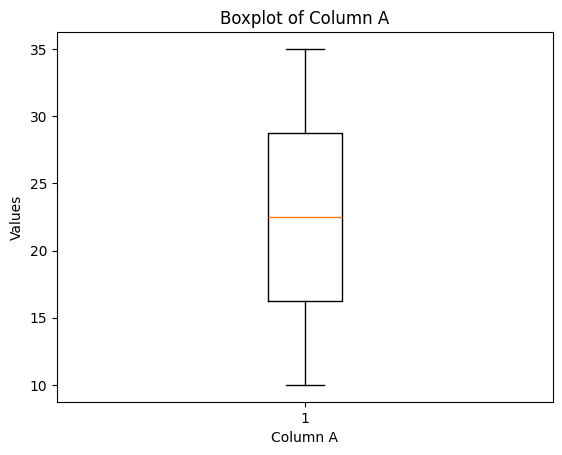

In [26]:
# Boxplot for outlier visualization
plt.boxplot(df['A'])
plt.xlabel('Column A')
plt.ylabel('Values')
plt.title('Boxplot of Column A')
plt.show()

##### **Capping/Flooring Outliers**

In [27]:
# Sample DataFrame with numerical column 'A'
data = {'A': [10, 15, 20, 25, 30, 35, 200]}
df = pd.DataFrame(data)

# Calculate IQR
Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers = df[(df['A'] < Q1 - 1.5 * IQR) | (df['A'] > Q3 + 1.5 * IQR)]

In [28]:
# Cap upper outliers to a threshold
threshold = Q3 + 1.5 * IQR
df['A'] = df['A'].apply(lambda x: threshold if x > threshold else x)

# Floor lower outliers to a threshold
threshold = Q1 - 1.5 * IQR
df['A'] = df['A'].apply(lambda x: threshold if x < threshold else x)

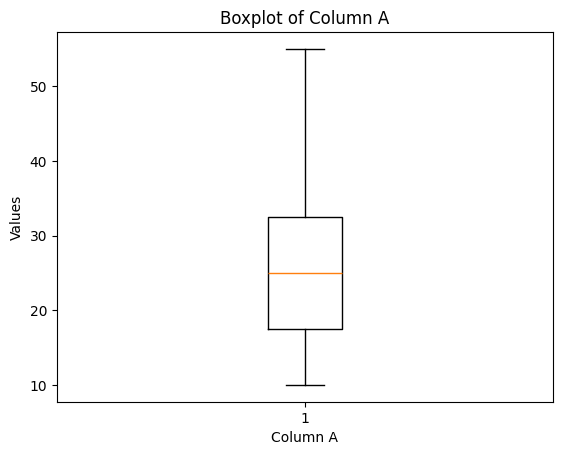

In [29]:
# Boxplot for outlier visualization
plt.boxplot(df['A'])
plt.xlabel('Column A')
plt.ylabel('Values')
plt.title('Boxplot of Column A')
plt.show()

#### **2. Using Z-Score**

In [30]:
from scipy import stats

data = {'A': [10, 15, 20, 25, 30, 35, 200]}
df = pd.DataFrame(data)

# Calculate z-scores
z_scores = stats.zscore(df['A'])

# Identify outliers based on z-scores (e.g., consider values with z-score > 3 or < -3 as outliers)
outliers = df[abs(z_scores) > 3]

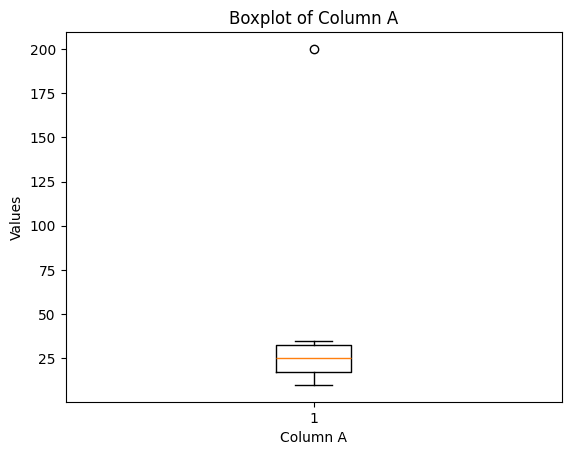

In [31]:
# Boxplot for outlier visualization
plt.boxplot(df['A'])
plt.xlabel('Column A')
plt.ylabel('Values')
plt.title('Boxplot of Column A')
plt.show()

Now we can remove or cap the outliers same way as we did above for the iqr method

### **Handling Categorical Variables**

#### **1. Ordinal Encoding**
Use when the categorical variable has an inherent order.

In [32]:
# Sample DataFrame with 'Size' as ordinal categorical variable
data = {'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']}
df = pd.DataFrame(data)

# Define mapping for ordinal variable
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}

# Perform ordinal encoding
df['Size_encoded'] = df['Size'].map(size_mapping)
print(df)

     Size  Size_encoded
0   Small             1
1  Medium             2
2   Large             3
3  Medium             2
4   Small             1


In [43]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with 'Color' as a categorical variable
data = {'Color': ['Red', 'Blue', 'Green', 'Green', 'Red']}
df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Color' column
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])
df.head()

,Color,Color_encoded
0,Red,2
1,Blue,0
2,Green,1
3,Green,1
4,Red,2


#### **2. One-Hot Encoding**
Use when there is no intrinsic order among categorical variables.

In [35]:
# Perform one-hot encoding using Pandas
one_hot_encoded = pd.get_dummies(df['Size'], prefix='Size')

# Concatenate one-hot encoded columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)
df.head()

,Size,Size_encoded,Size_Large,Size_Medium,Size_Small,Size_Large,Size_Medium,Size_Small,Size_Large,Size_Medium,Size_Small
0,Small,1,False,False,True,False,False,True,False,False,True
1,Medium,2,False,True,False,False,True,False,False,True,False
2,Large,3,True,False,False,True,False,False,True,False,False
3,Medium,2,False,True,False,False,True,False,False,True,False
4,Small,1,False,False,True,False,False,True,False,False,True


#### **3. Frequency Encoding**

In [45]:
# Sample DataFrame with 'Category' as a categorical variable
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'A']}
df = pd.DataFrame(data)

# Calculate frequency of categories
category_frequency = df['Category'].value_counts(normalize=True)

# Map category frequency to the original DataFrame
df['Category_frequency_encoded'] = df['Category'].map(category_frequency)
df.head()

,Category,Category_frequency_encoded
0,A,0.571429
1,B,0.285714
2,A,0.571429
3,C,0.142857
4,B,0.285714


### **Transformations**

#### **1. Standardization - Z Score Scaling or Standard Score Scaling**
Bringing all values or variables or features to a similar scale, centring variable at zero.<br>z = (x-x_mean)/standard_deviation

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample DataFrame with numerical columns
data = {'Feature1': [10, 20, 30, 40, 50],
        'Feature2': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Feature1,Feature2
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


#### **2. Min-Max Scaling**
x_new = (x-x_min)/(x_max-x_min)

In [49]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
scaled_data = min_max.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Feature1,Feature2
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


##### **If data follows standard normal distribution, use standardscaler else use minmaxscaler or robustscaler**

#### **3. Robust Scaler**
Scale Features to median and quantiles<br> x_new = x-x_median/IQR

In [50]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
# Fit and transform the data using RobustScaler
scaled_data = robust.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Feature1,Feature2
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,1.0,1.0


#### **4. Gaussian Transformations**
To convert any other transformations/distributions into gaussian/normal distribution<br> For better accuracy and performance of the models

##### Checking whether data is normally distributed or not

In [51]:
# Generating synthetic data (non-normal)
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)  # Exponential distribution (non-normal)

In [55]:
# graphically
# Assuming 'data' is your dataset
def check_normality(data):
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data, bins='auto')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

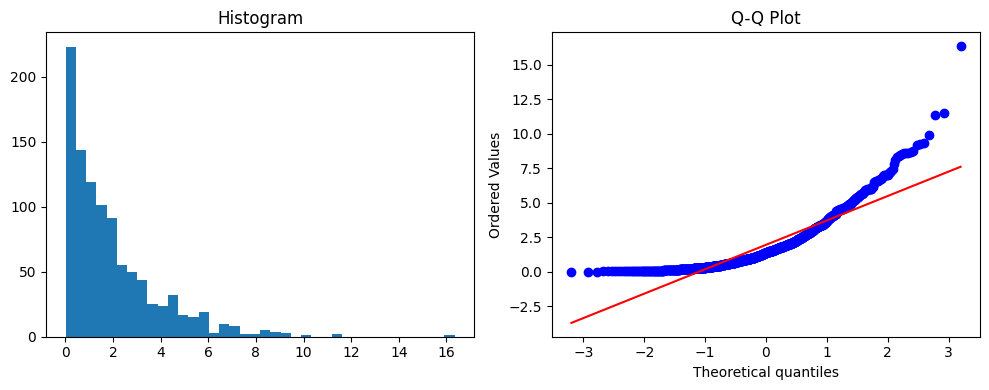

In [56]:
check_normality(data)

In [53]:
# using normaltest from scipy
from scipy.stats.mstats import normaltest
normaltest(data)

NormaltestResult(statistic=399.69798049053395, pvalue=1.6094827357236855e-87)

As we can see, the p-value is very small, so it is not normally distributed.

In [73]:
from scipy.stats import boxcox, yeojohnson

##### **A. Logarithmic Transformations**

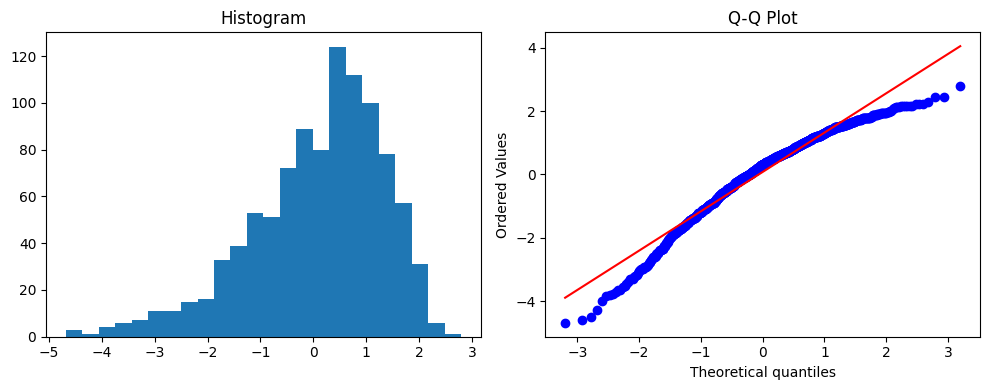

In [57]:
# Log Transformation
log_transformed_data = np.log(data)
check_normality(log_transformed_data)

##### **B. Box-Cox Transformations**

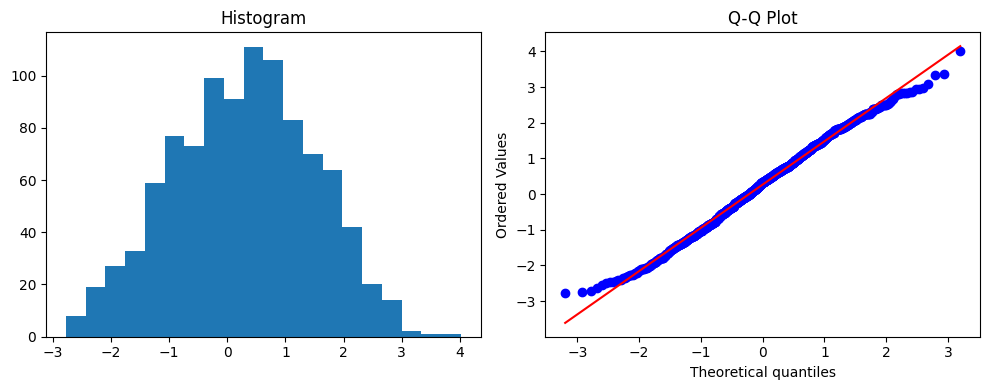

In [60]:
# Box-Cox Transformation
boxcox_transformed_data, _ = boxcox(data)  # Add 1 to handle zero or negative values, if data has them
check_normality(boxcox_transformed_data)

##### **C. Yeo-Johnson Transformation**

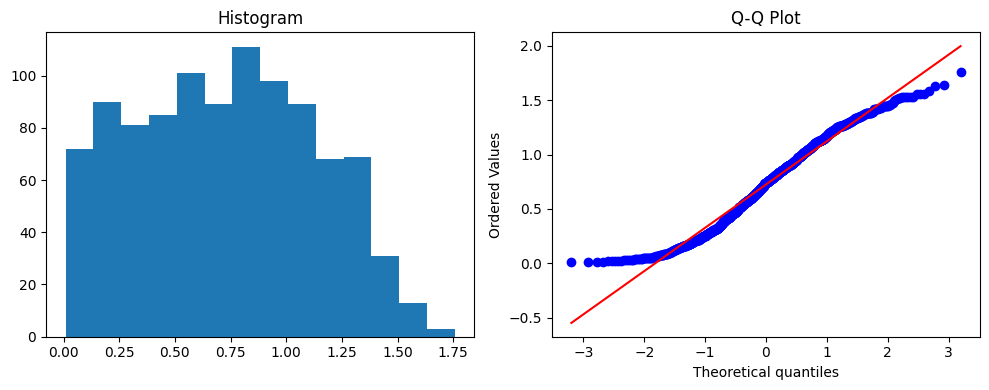

In [64]:
# Yeo-Johnson Transformation
yeojohnson_transformed_data, _ = yeojohnson(data)
check_normality(yeojohnson_transformed_data)

##### **D. Square Root Transformations**

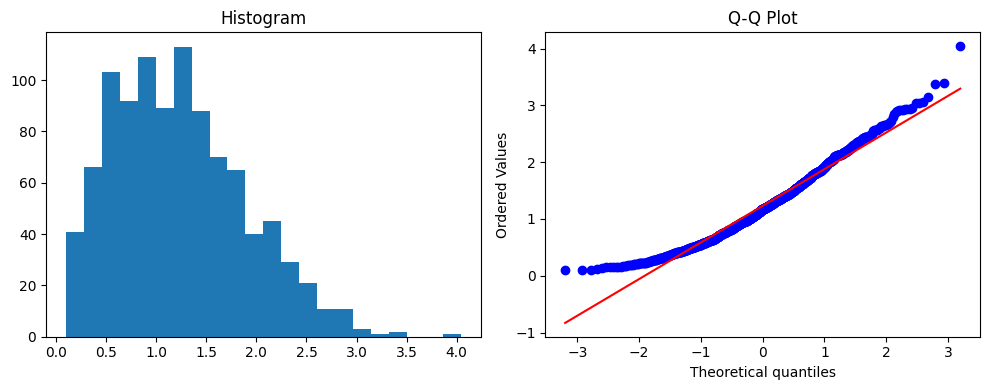

In [65]:
sq_root_transformed_data = data**0.5
check_normality(sq_root_transformed_data)

##### **E. Exponential Transformations**

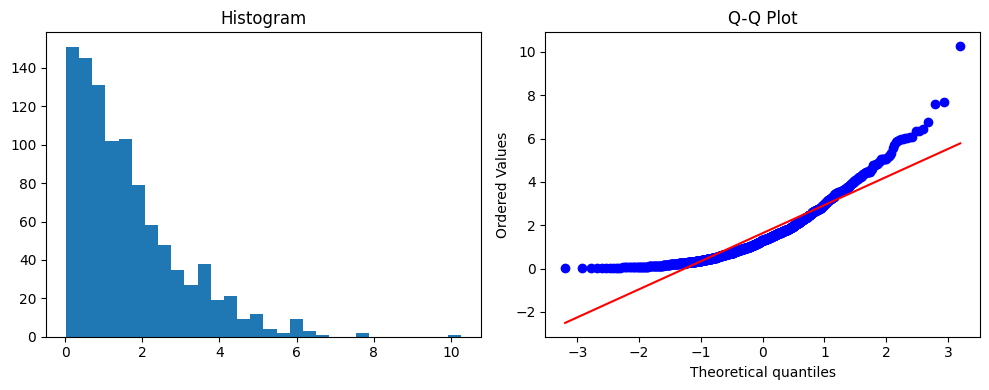

In [66]:
exp_transformed_data = data**(1/1.2)
check_normality(exp_transformed_data)

### **Handling Imbalanced Data**

#### **1. Random Oversampling with imbalanced-learn**
Bringing up values that are smaller in amount

In [68]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np

# Generating synthetic imbalanced data
np.random.seed(42)
X_train = np.random.randn(1000, 10)  # Features
y_train = np.random.choice([0, 1], size=(1000,), p=[0.9, 0.1])  # Imbalanced labels

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_ros)}")

Original class distribution: Counter({0: 900, 1: 100})
Resampled class distribution: Counter({0: 900, 1: 900})


#### **2. Random Undersampling with imbalanced-learn**
Bringing down values that are larger in amount

In [69]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np

# Generating synthetic imbalanced data
np.random.seed(42)
X_train = np.random.randn(1000, 10)  # Features
y_train = np.random.choice([0, 1], size=(1000,), p=[0.9, 0.1])  # Imbalanced labels

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_rus)}")

Original class distribution: Counter({0: 900, 1: 100})
Resampled class distribution: Counter({0: 100, 1: 100})


#### **3. SMOTE with imbalanced-learn**

In [70]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Generating synthetic imbalanced data
np.random.seed(42)
X_train = np.random.randn(1000, 10)  # Features
y_train = np.random.choice([0, 1], size=(1000,), p=[0.9, 0.1])  # Imbalanced labels

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_smote)}")

Original class distribution: Counter({0: 900, 1: 100})
Resampled class distribution: Counter({0: 900, 1: 900})


#### **4. Cost-Sensitive Learning with Scikit-learn**

In [71]:
from sklearn.svm import SVC
import numpy as np

# Generating synthetic imbalanced data
np.random.seed(42)
X_train = np.random.randn(1000, 10)  # Features
y_train = np.random.choice([0, 1], size=(1000,), p=[0.9, 0.1])  # Imbalanced labels

svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
# ... Continue with model fitting and evaluation

SVC(class_weight='balanced', random_state=42)